In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.options.display.float_format = "{:,.3f}".format

In [3]:
%run ../utils/results_explore.py

<Figure size 640x480 with 0 Axes>

In [4]:
protocols_dict = {f"{ts}_{relation}": {'train_structure': ts, 'relation_type': relation} 
                  for ts in ["LS", "OTM", "MTO"] for relation in [
                      'select_reject',
                      'select_only', 
                      'reject_only', 
                  ]}
protocol_names = list(protocols_dict.keys())

In [24]:
###########################
folder_path = "prob_agent_v04_m6_c4_filt"+"/"#agents3_v04_m6_c4_unfilt # agents3_v04_m6_c4_filt#prob_agent_v04_m6_c4_unfilt
###########################

output_df = pd.DataFrame()
for prtcl in protocol_names:
    path = "salidas/"+folder_path+prtcl+".pkl"
    try:
        prtcl_out = pd.read_pickle(path)  
        prtcl_out["protocol"]= prtcl
        protocols_dict[prtcl]["output"] = prtcl_out
        output_df = pd.concat([output_df, prtcl_out])
    except:
        pass

In [25]:
train_info_arr = np.array([[protocols_dict[ptr_nm]['train_structure'], 
  (protocols_dict[ptr_nm]['relation_type']).replace("_"," ")] 
 for ptr_nm in output_df.protocol])

In [26]:
output_df['train_structure'] = train_info_arr[:,0]
output_df['relation_type'] = train_info_arr[:,1]

In [27]:
# output_df['response_score'] = output_df['GPT_response_score']#['BERT_response_score']

In [28]:
output_df.pivot_table(
    index = ['train_structure', 'relation_type'],
    columns = 'sample_subset',
    values = 'response_score',
    aggfunc = 'mean'
).reset_index()

sample_subset train_structure  relation_type  baseline  reflexivity  symmetry  \
0                          LS    reject only     1.000        0.306     0.383   
1                          LS    select only     1.000        0.264     0.300   
2                          LS  select reject     1.000        0.250     0.317   
3                         MTO    reject only     1.000        0.431     0.233   
4                         MTO    select only     1.000        0.181     0.333   
5                         MTO  select reject     1.000        0.208     0.467   
6                         OTM    reject only     1.000        0.375     0.383   
7                         OTM    select only     1.000        0.222     0.200   
8                         OTM  select reject     1.000        0.417     0.483   

sample_subset  transitivity  
0                     0.296  
1                     0.354  
2                     0.325  
3                     0.358  
4                     0.338  
5                     0.221  
6                     0.312  
7                     0.312  
8                     0.300

In [12]:
full_out_pivot = output_df.pivot_table(
    index = ['train_structure', 'relation_type'],
    columns = 'sample_subset',
    values = ['FFN_response_score','BERT_response_score','GPT_response_score'],
    aggfunc = 'mean'
).stack(level = 0).reset_index()
full_out_pivot['level_2'] = [agent_name.replace("_response_score", "") for agent_name in full_out_pivot['level_2']]
full_out_pivot.columns = ['train structure', 'relation type', 'agent', 'baseline',
       'reflexivity', 'symmetry', 'transitivity']

C:\Users\alexi\AppData\Local\Temp\ipykernel_16512\641484546.py:6: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  ).stack(level = 0).reset_index()


In [13]:
full_out_pivot[['agent', 'train structure', 'relation type', 'baseline','reflexivity', 'symmetry', 'transitivity']]

agent train structure  relation type  baseline  reflexivity  symmetry  \
0   BERT              LS    reject only     0.999        0.332     0.336   
1    FFN              LS    reject only     1.000        0.353     0.346   
2    GPT              LS    reject only     1.000        0.341     0.337   
3   BERT              LS    select only     1.000        0.305     0.323   
4    FFN              LS    select only     1.000        0.344     0.295   
5    GPT              LS    select only     1.000        0.032     0.034   
6   BERT              LS  select reject     0.998        0.983     0.970   
7    FFN              LS  select reject     1.000        0.926     0.915   
8    GPT              LS  select reject     0.999        0.697     0.953   
9   BERT             MTO    reject only     1.000        0.318     0.338   
10   FFN             MTO    reject only     1.000        0.348     0.311   
11   GPT             MTO    reject only     1.000        0.335     0.329   
12  BERT             MTO    select only     0.999        0.327     0.240   
13   FFN             MTO    select only     1.000        0.327     0.225   
14   GPT             MTO    select only     1.000        0.300     0.267   
15  BERT             MTO  select reject     0.997        0.357     0.218   
16   FFN             MTO  select reject     1.000        0.907     0.253   
17   GPT             MTO  select reject     0.998        0.363     0.306   
18  BERT             OTM    reject only     0.999        0.309     0.291   
19   FFN             OTM    reject only     1.000        0.353     0.342   
20   GPT             OTM    reject only     1.000        0.222     0.214   
21  BERT             OTM    select only     0.999        0.299     0.068   
22   FFN             OTM    select only     1.000        0.382     0.007   
23   GPT             OTM    select only     0.999        0.290     0.092   
24  BERT             OTM  select reject     0.998        0.353     0.086   
25   FFN             OTM  select reject     1.000        0.634     0.204   
26   GPT             OTM  select reject     0.999        0.418     0.193   

    transitivity  
0          0.332  
1          0.348  
2          0.336  
3          0.321  
4          0.312  
5          0.033  
6          0.956  
7          0.898  
8          0.829  
9          0.336  
10         0.356  
11         0.337  
12         0.246  
13         0.233  
14         0.230  
15         0.294  
16         0.916  
17         0.313  
18         0.322  
19         0.307  
20         0.240  
21         0.365  
22         0.462  
23         0.334  
24         0.296  
25         0.565  
26         0.446

In [14]:
random_limit = .35
agents_names = [
    'BERT', 
    'GPT', 
    'FFN'
]

C:\Users\alexi\Dropbox\ULL\Experimentos\utils\results_explore.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

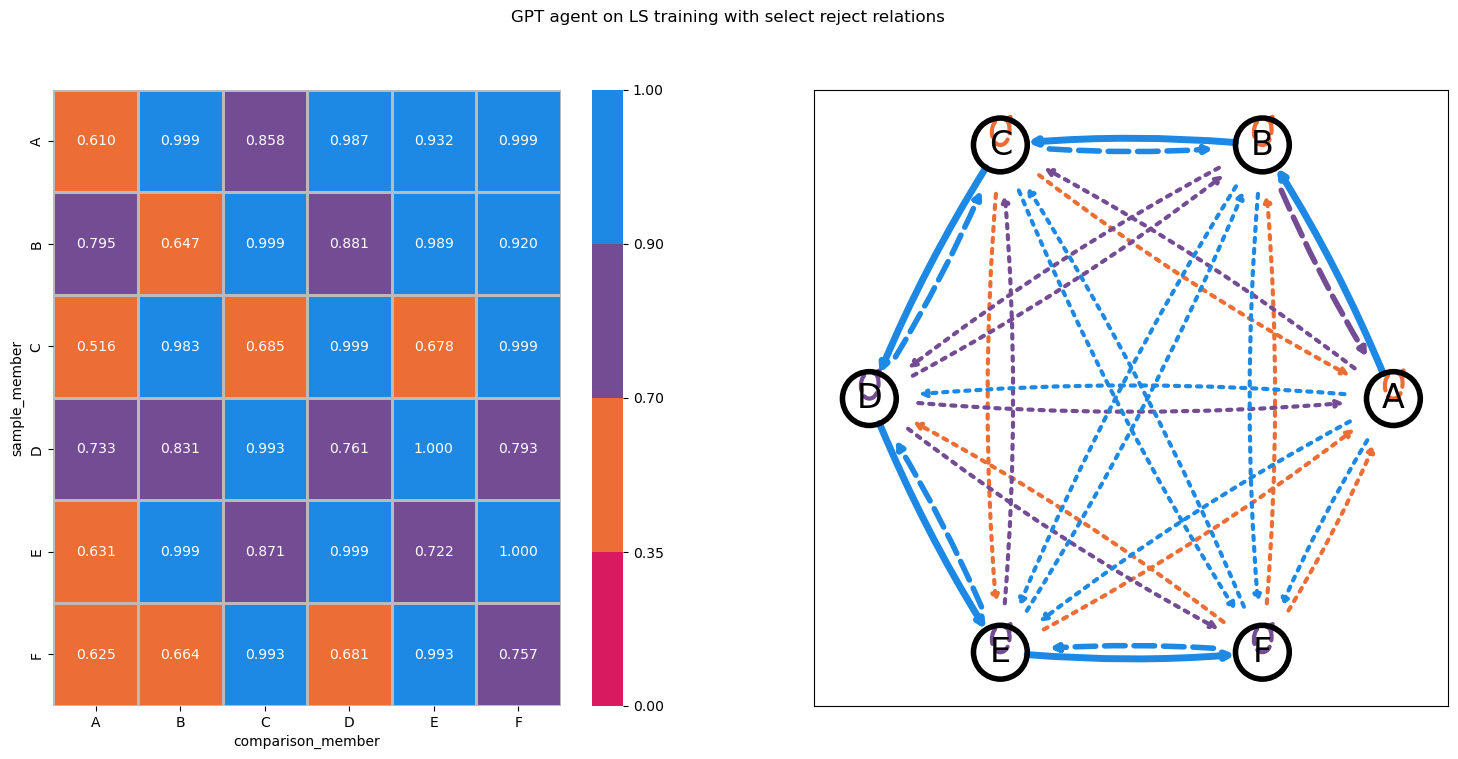

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

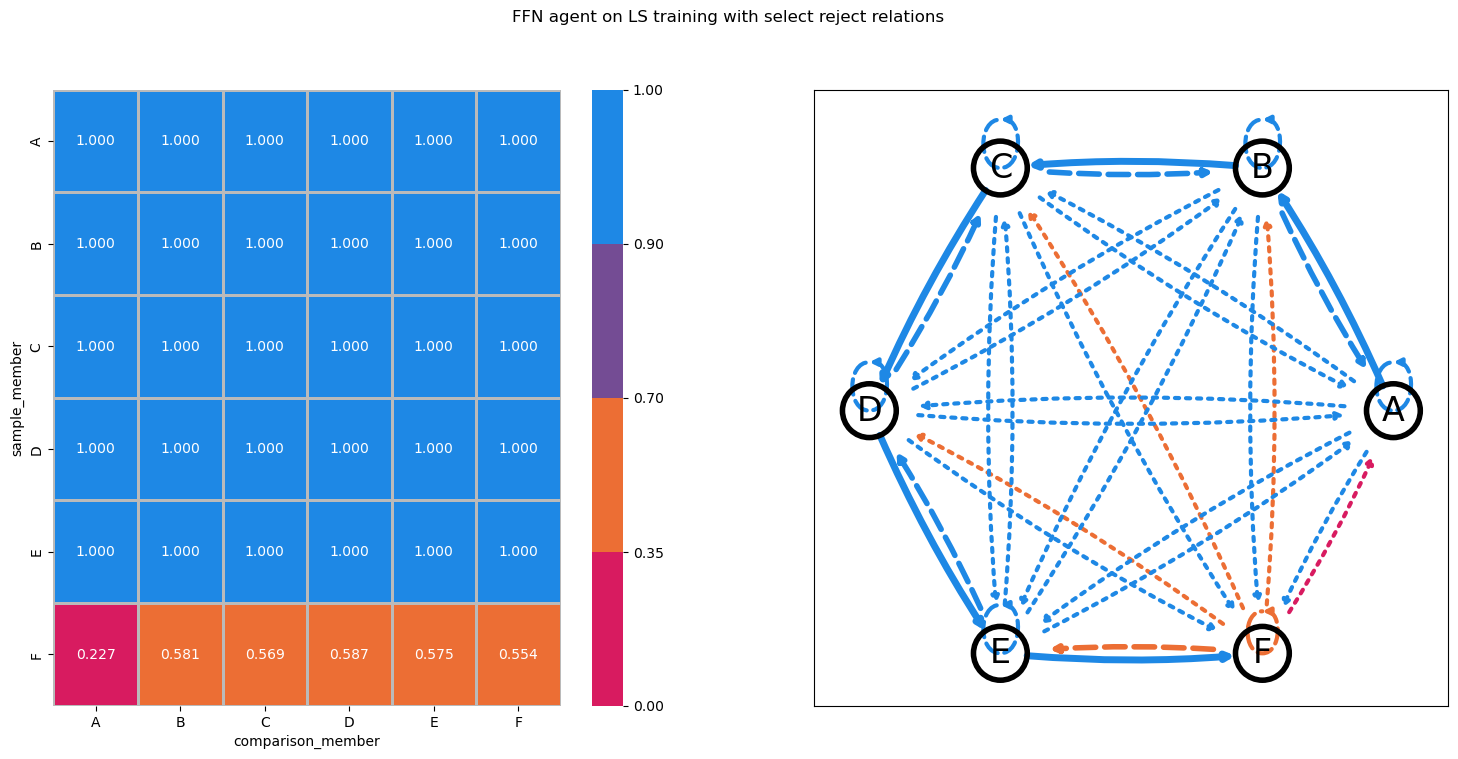

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

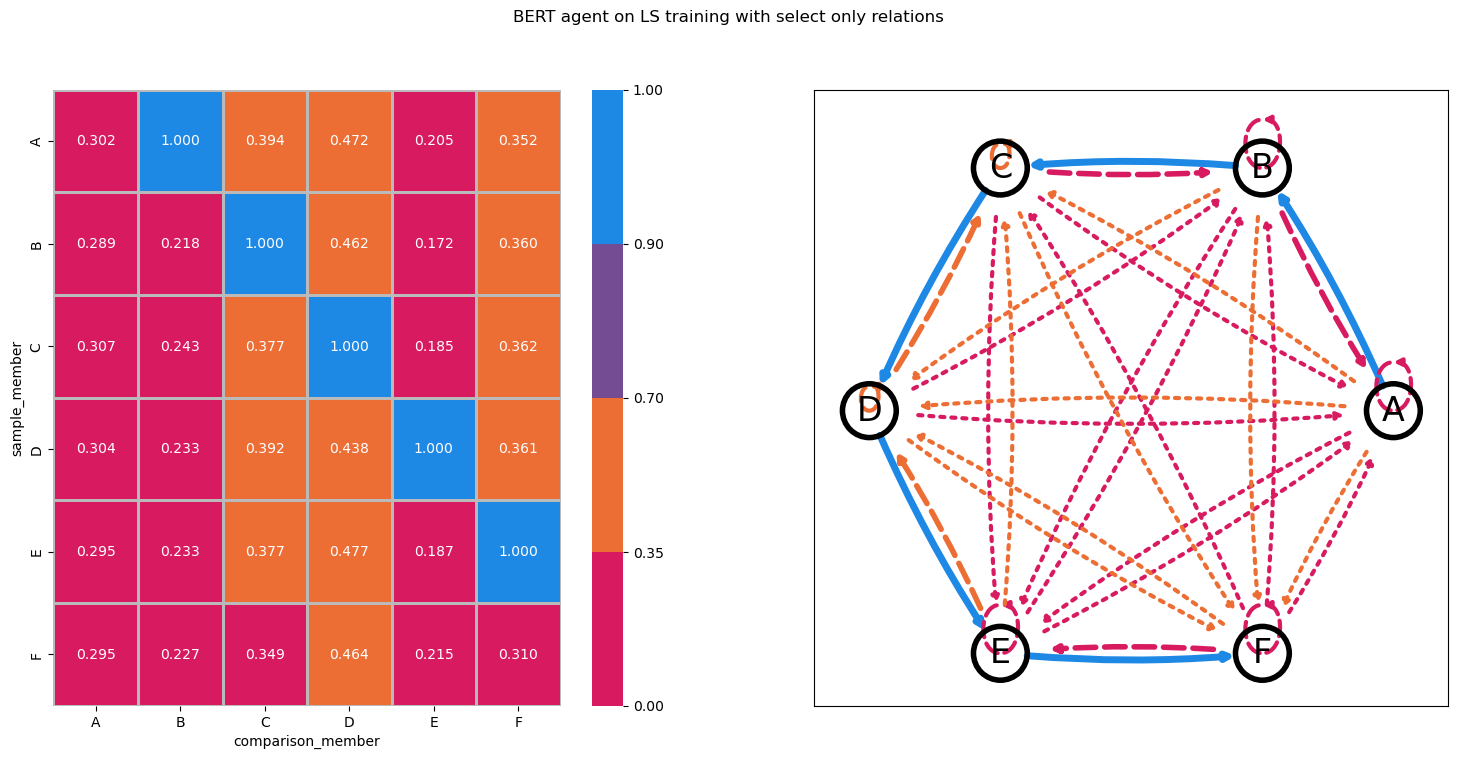

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

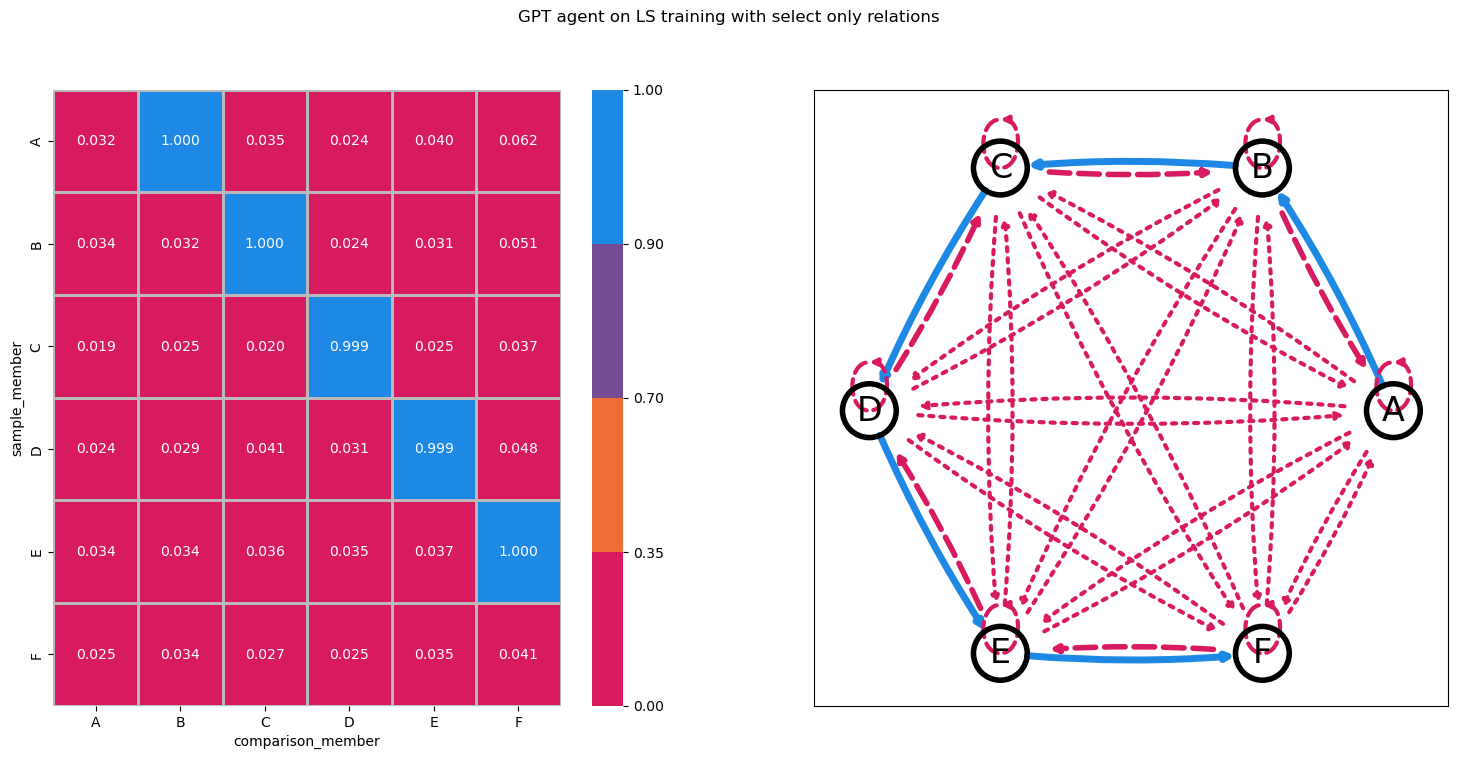

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

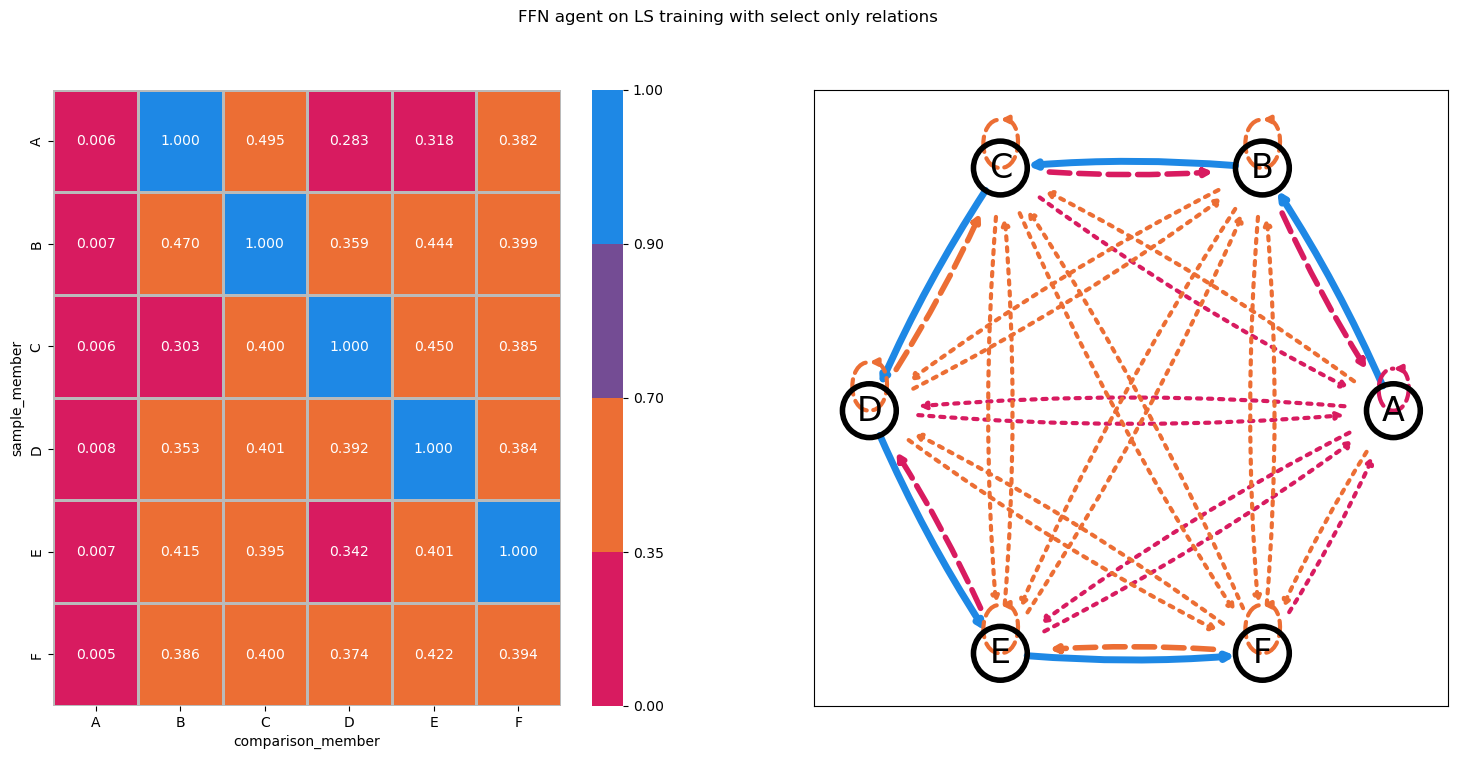

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

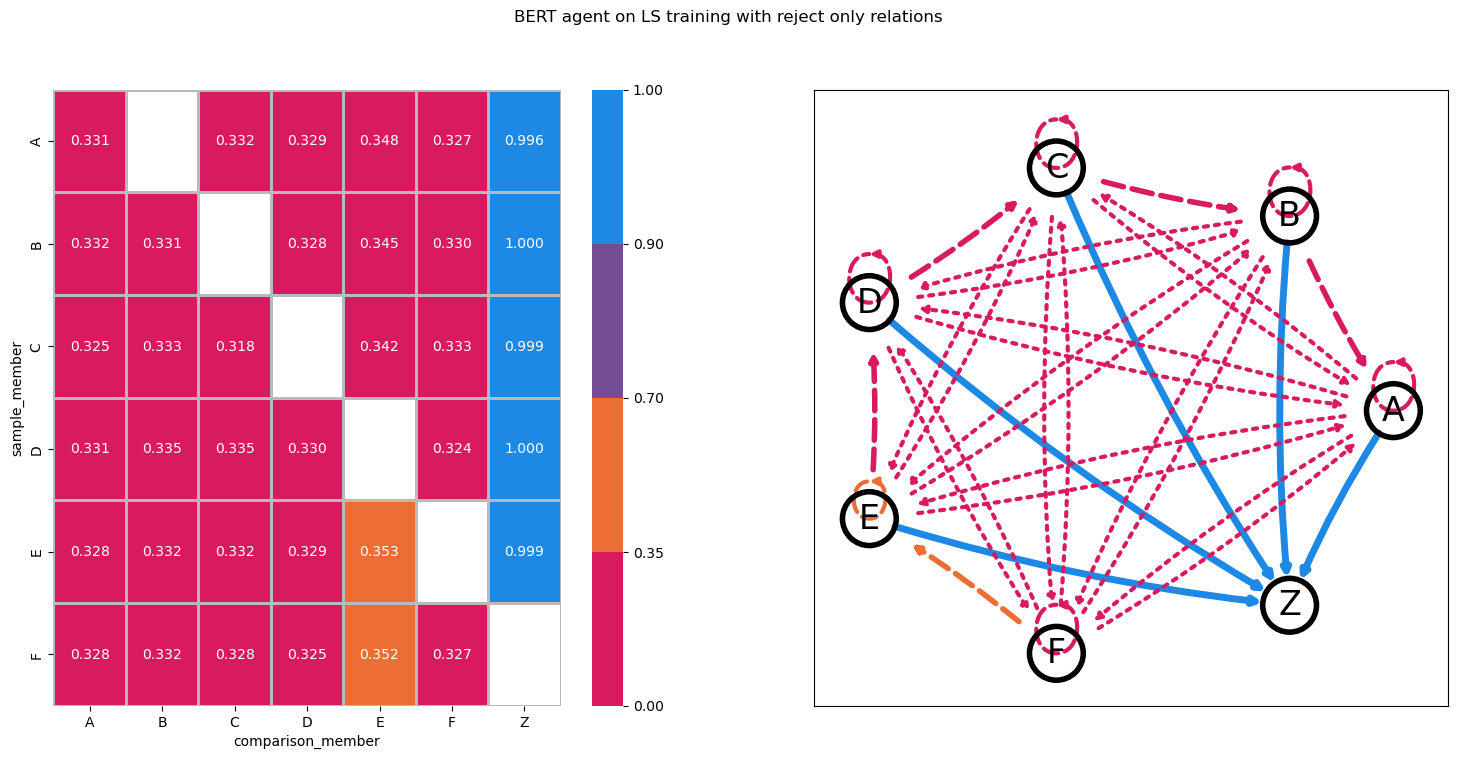

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

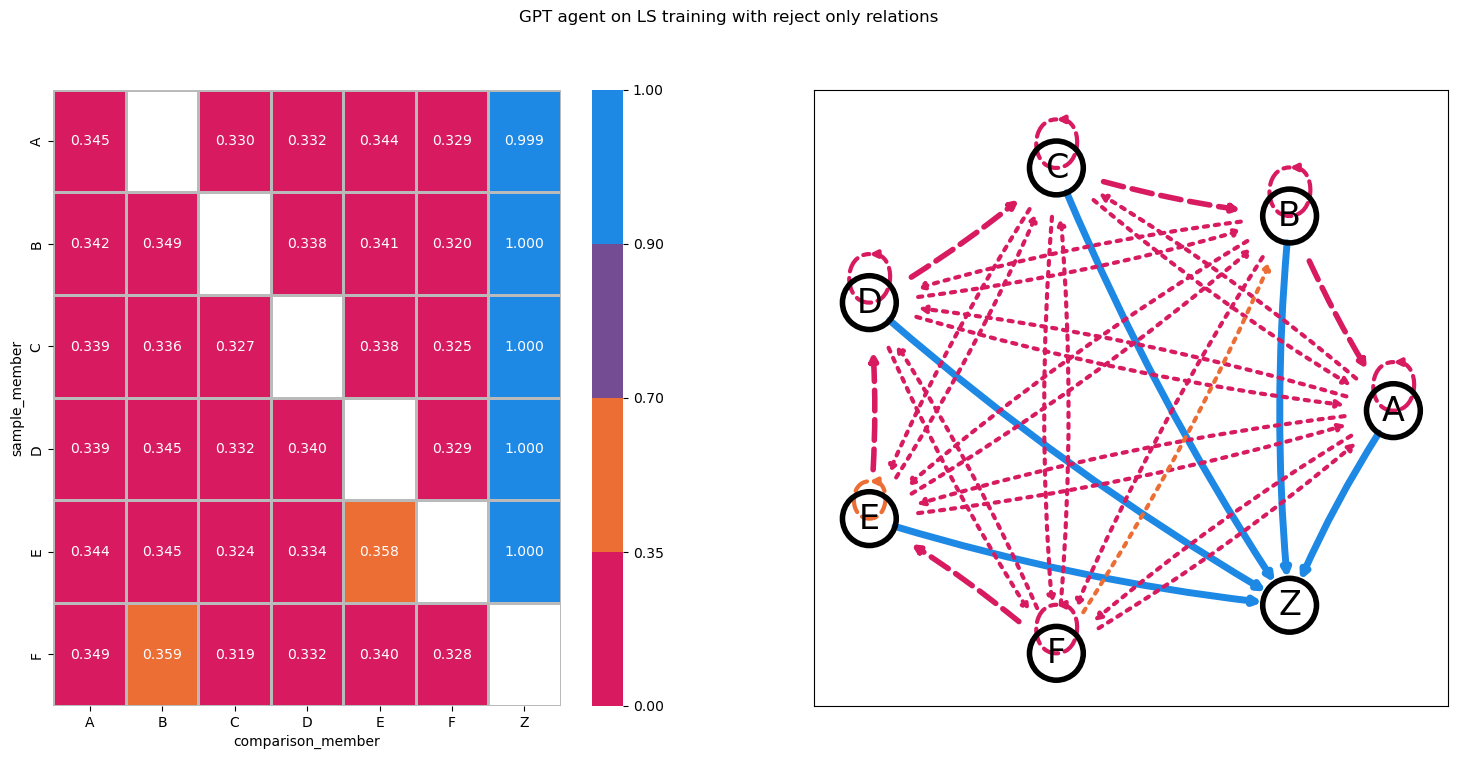

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

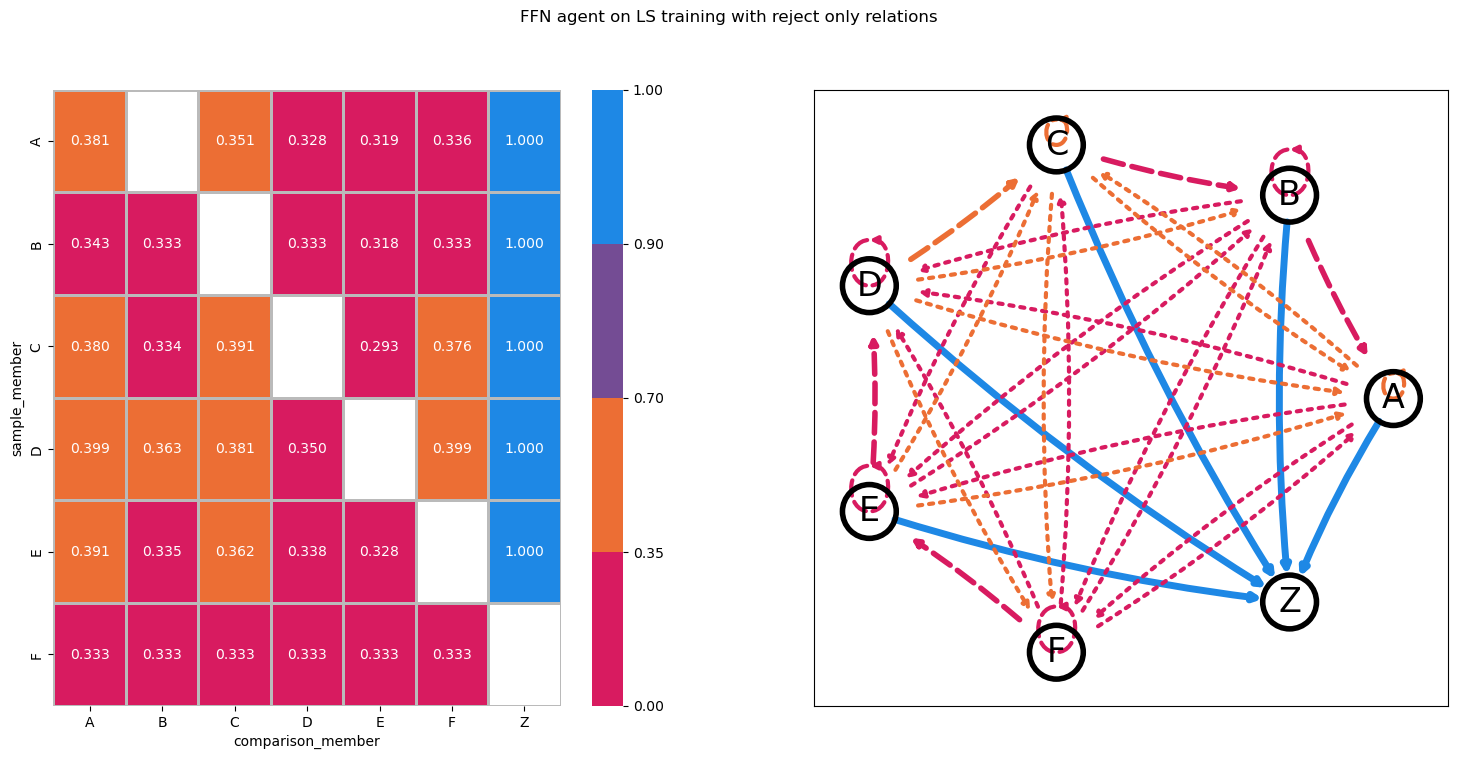

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

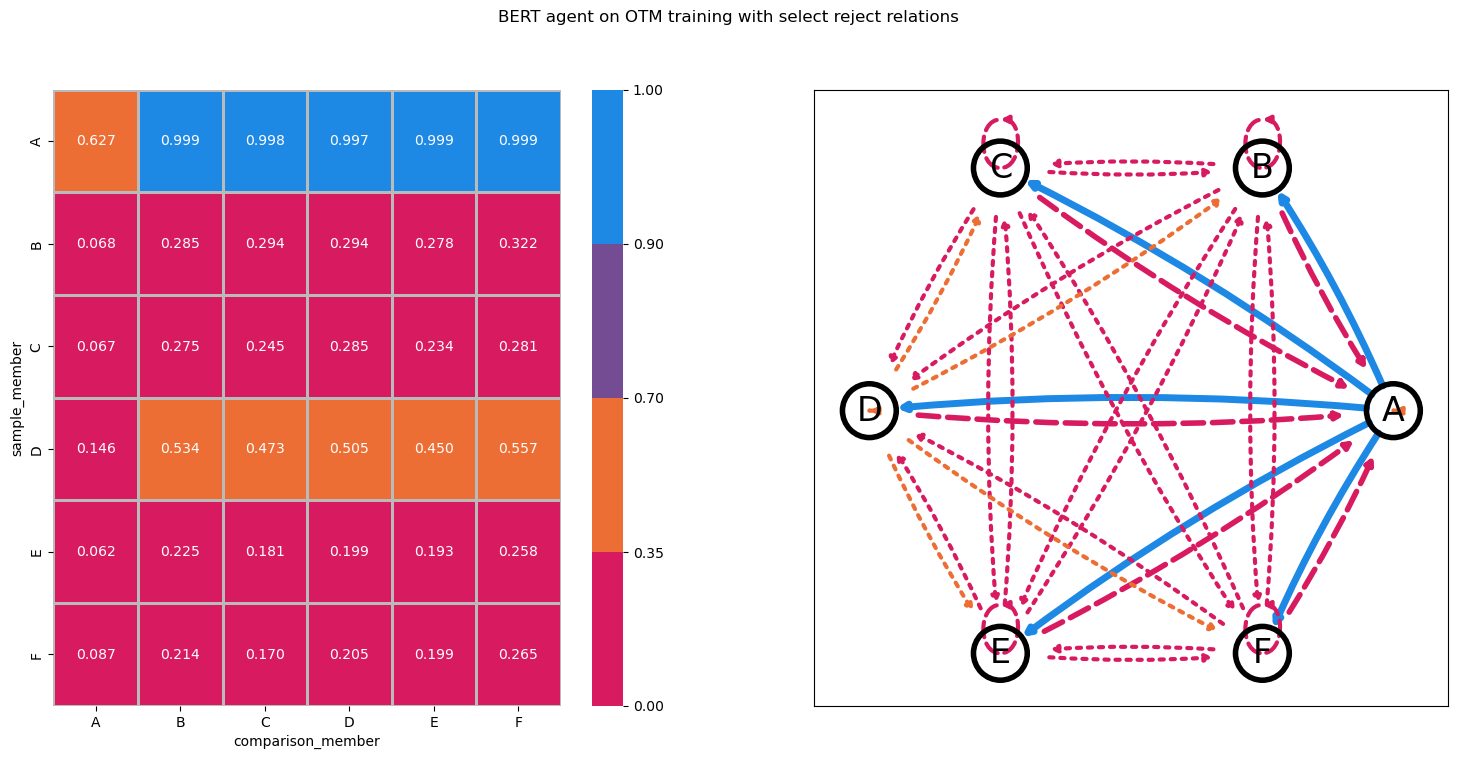

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

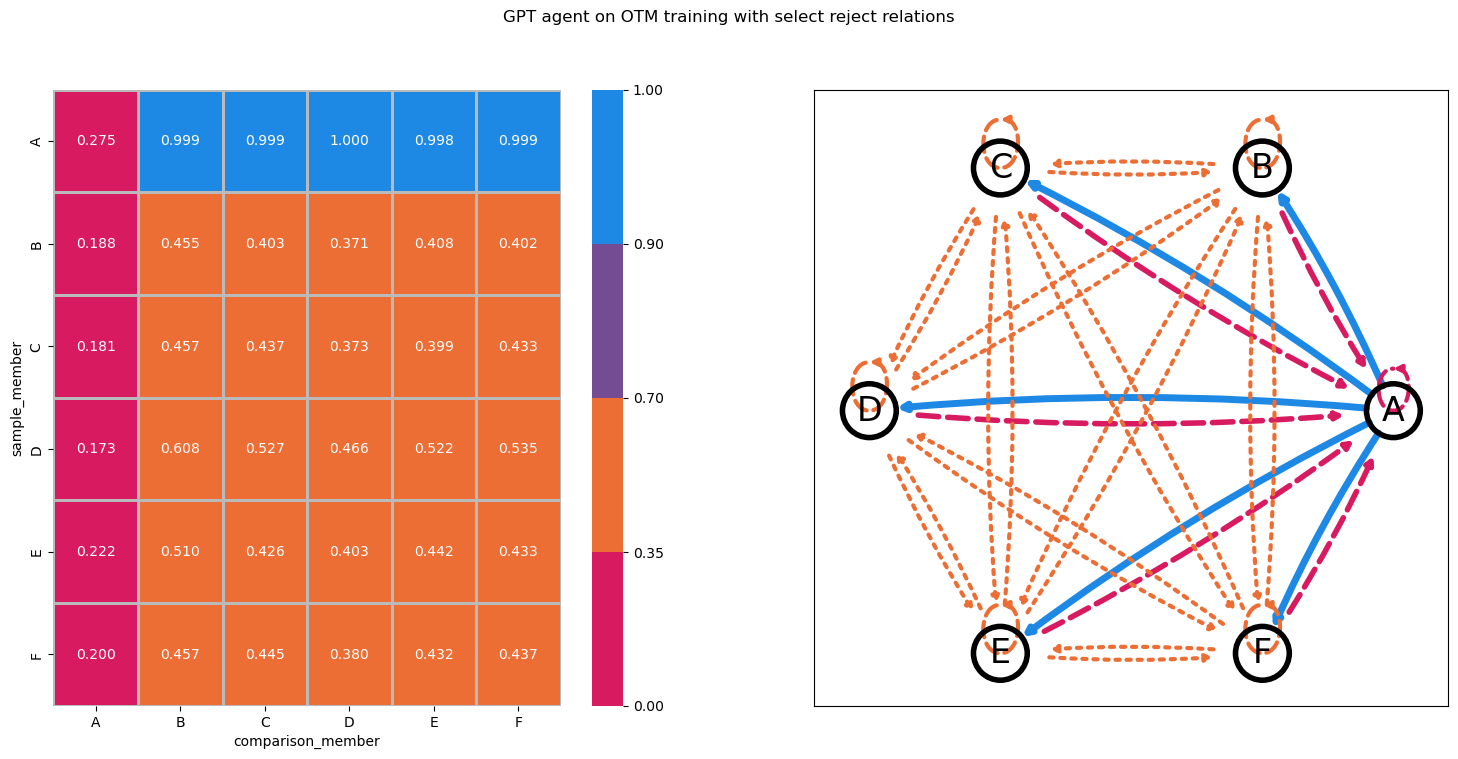

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

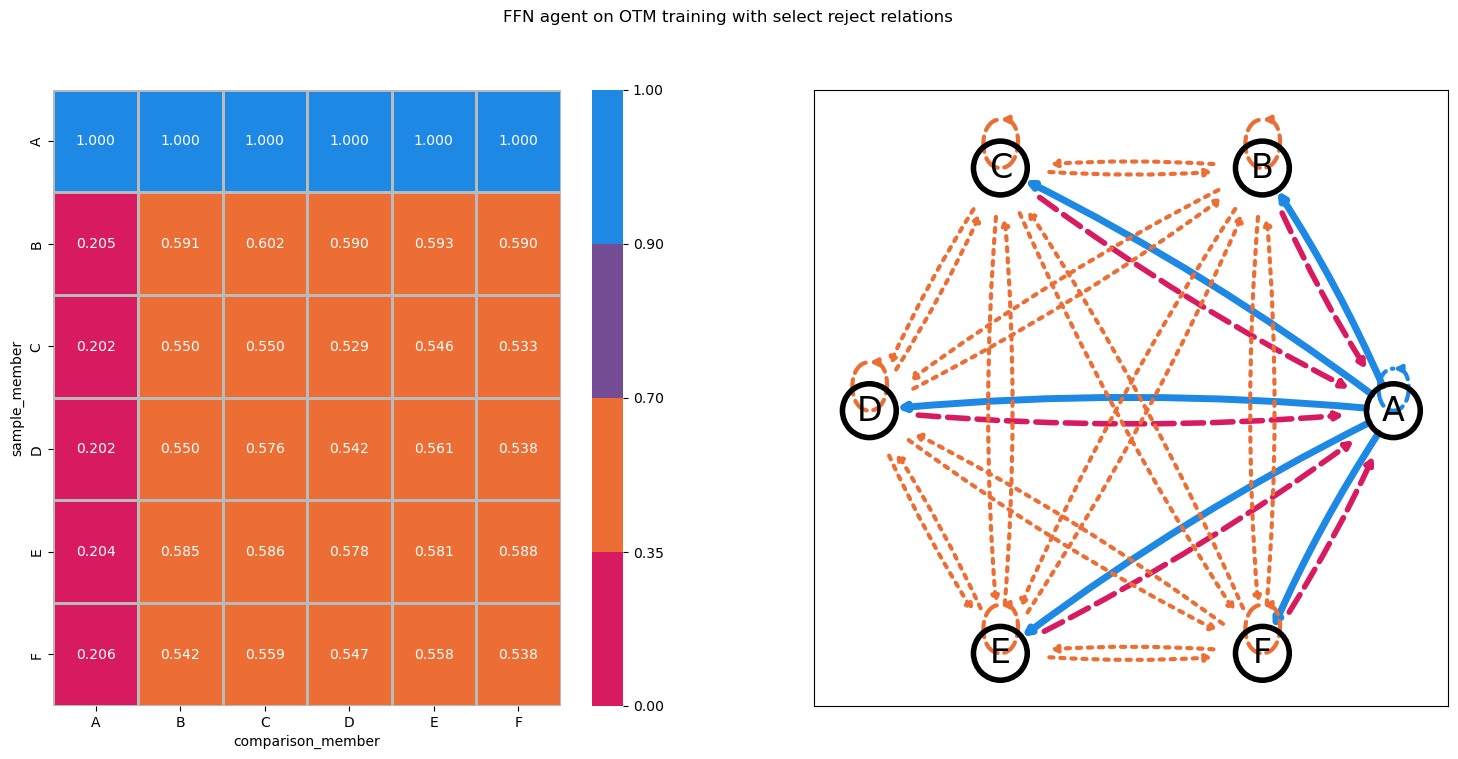

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

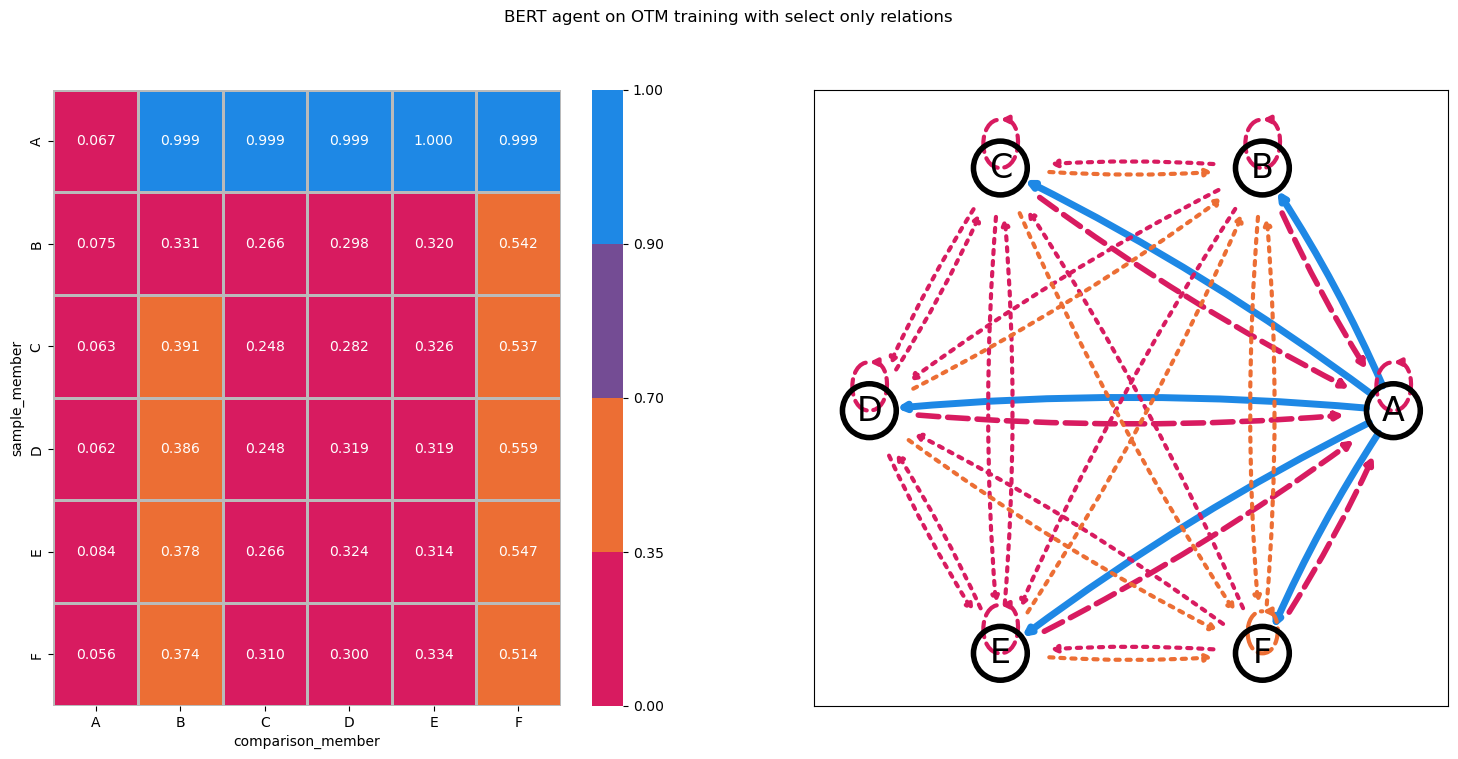

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

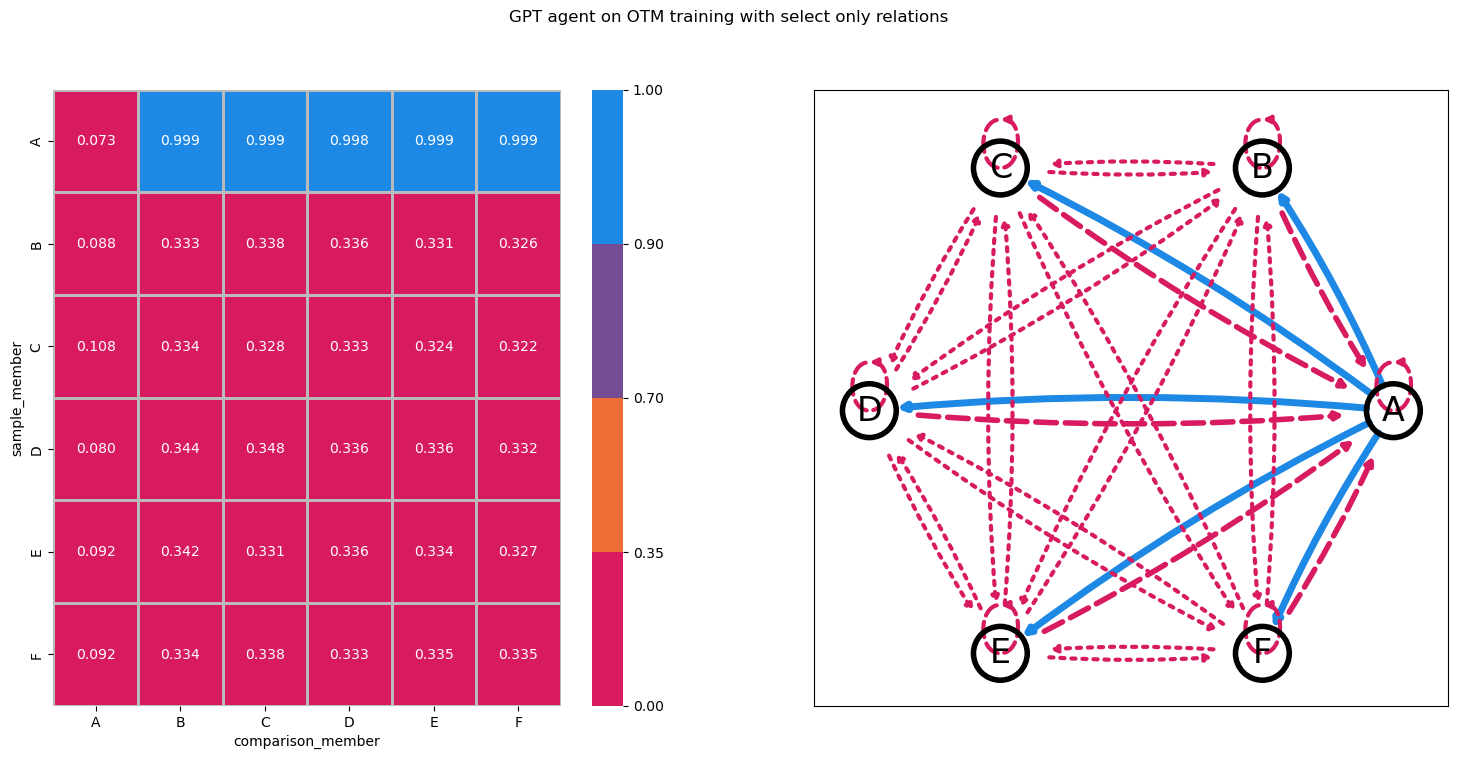

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

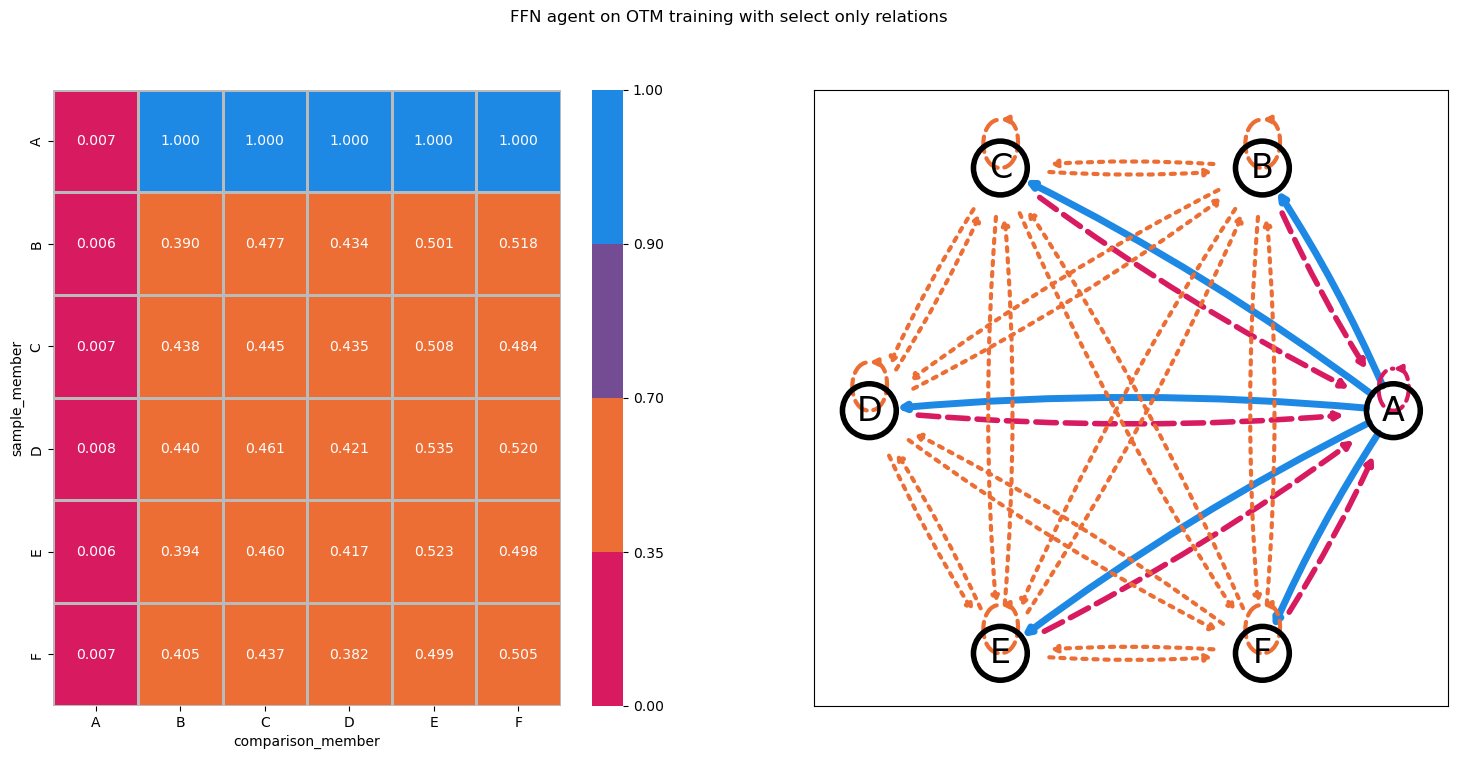

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

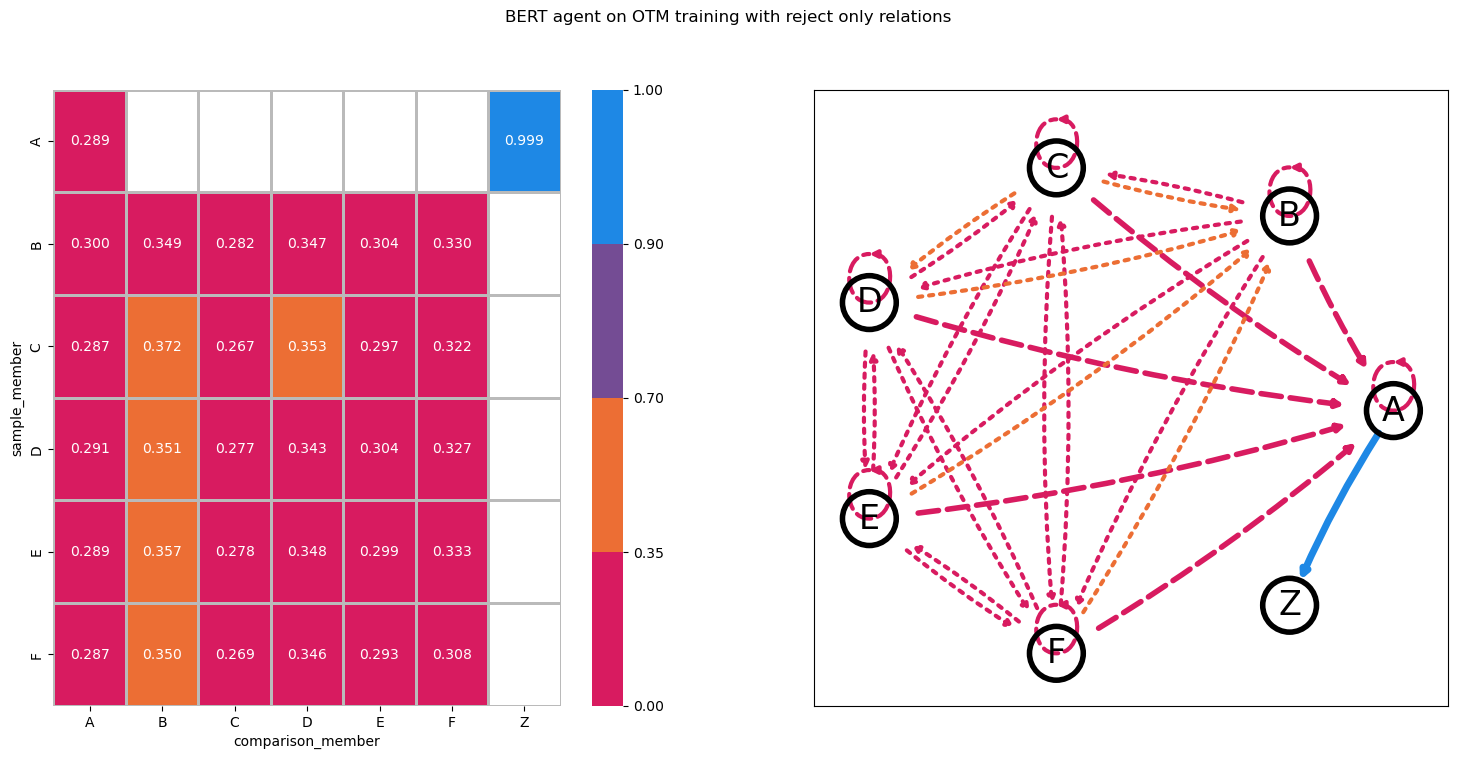

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

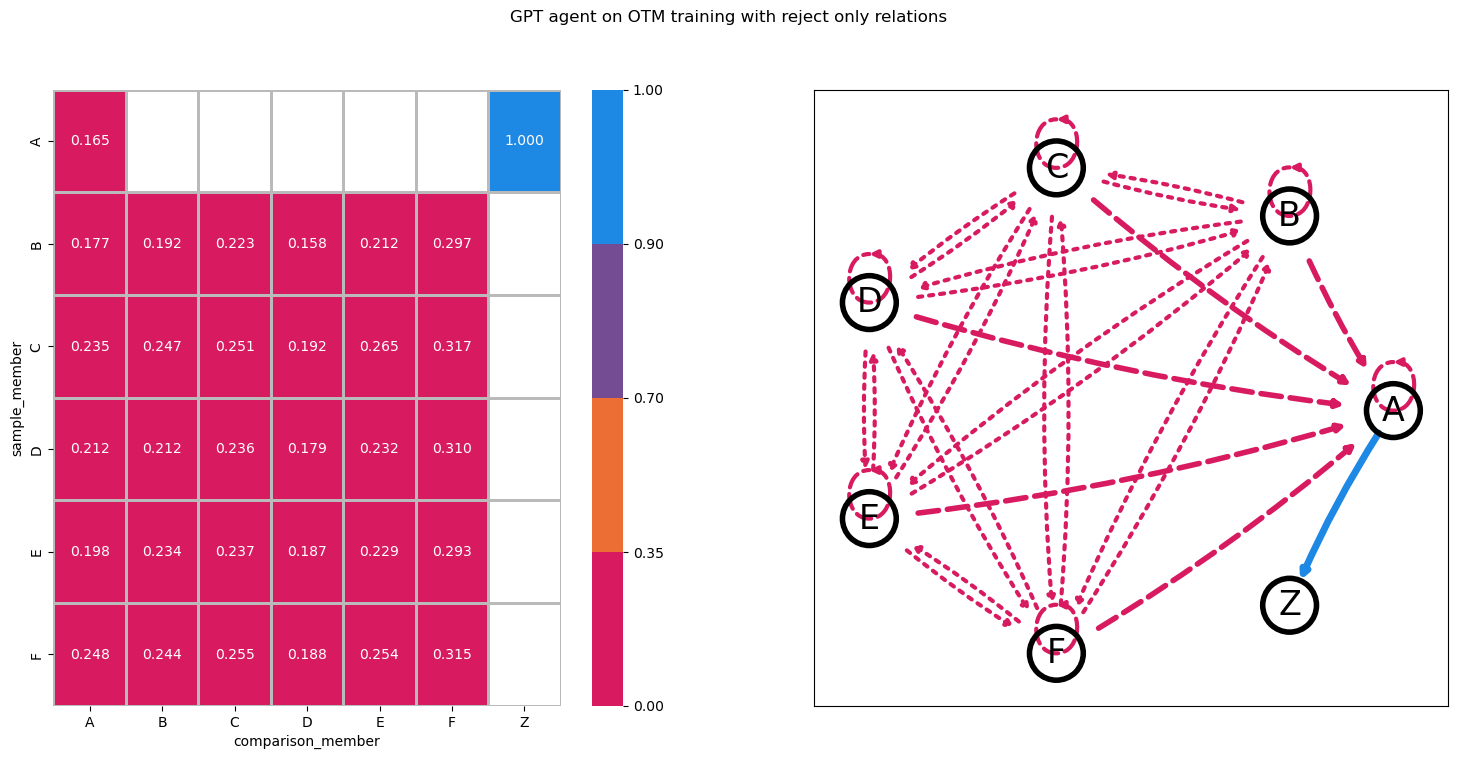

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

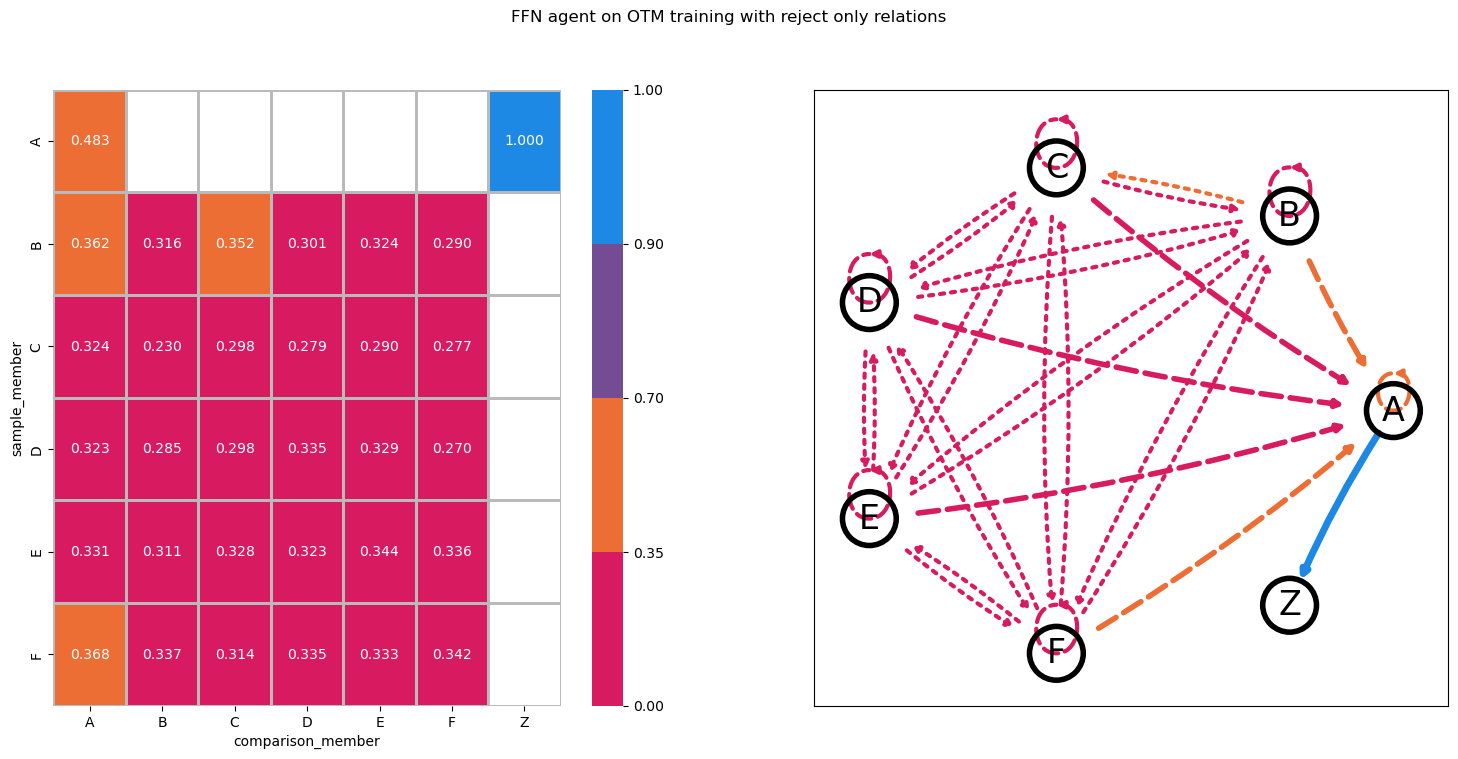

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

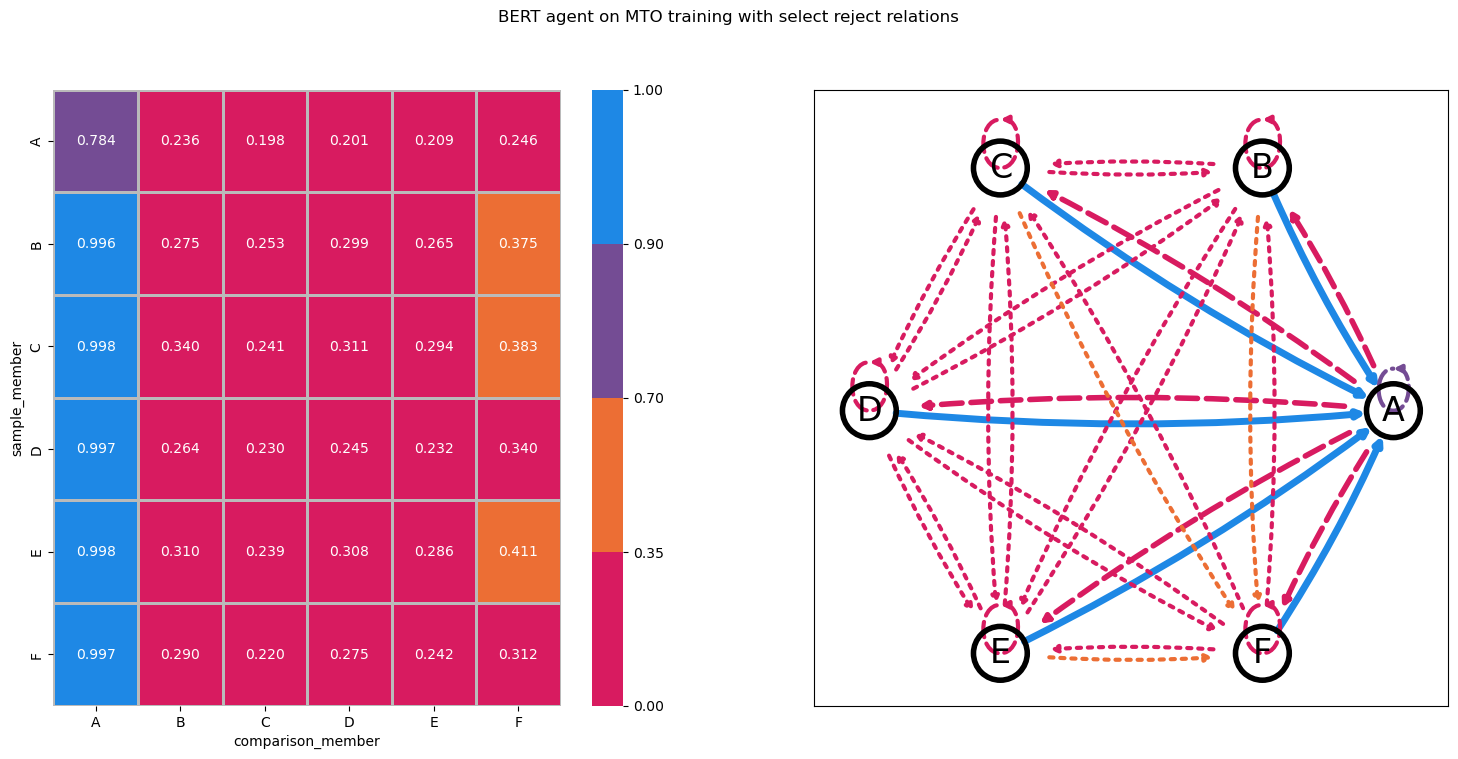

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

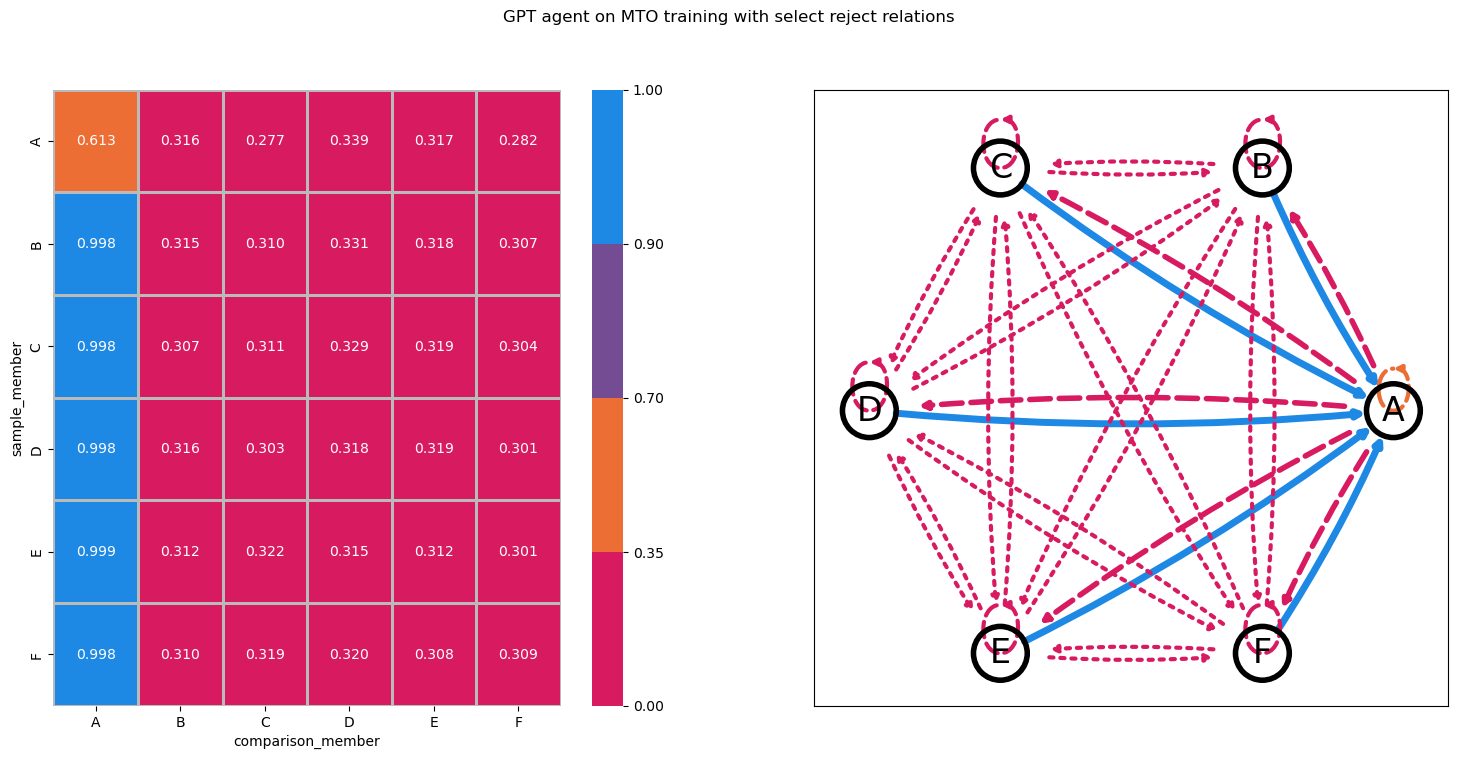

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

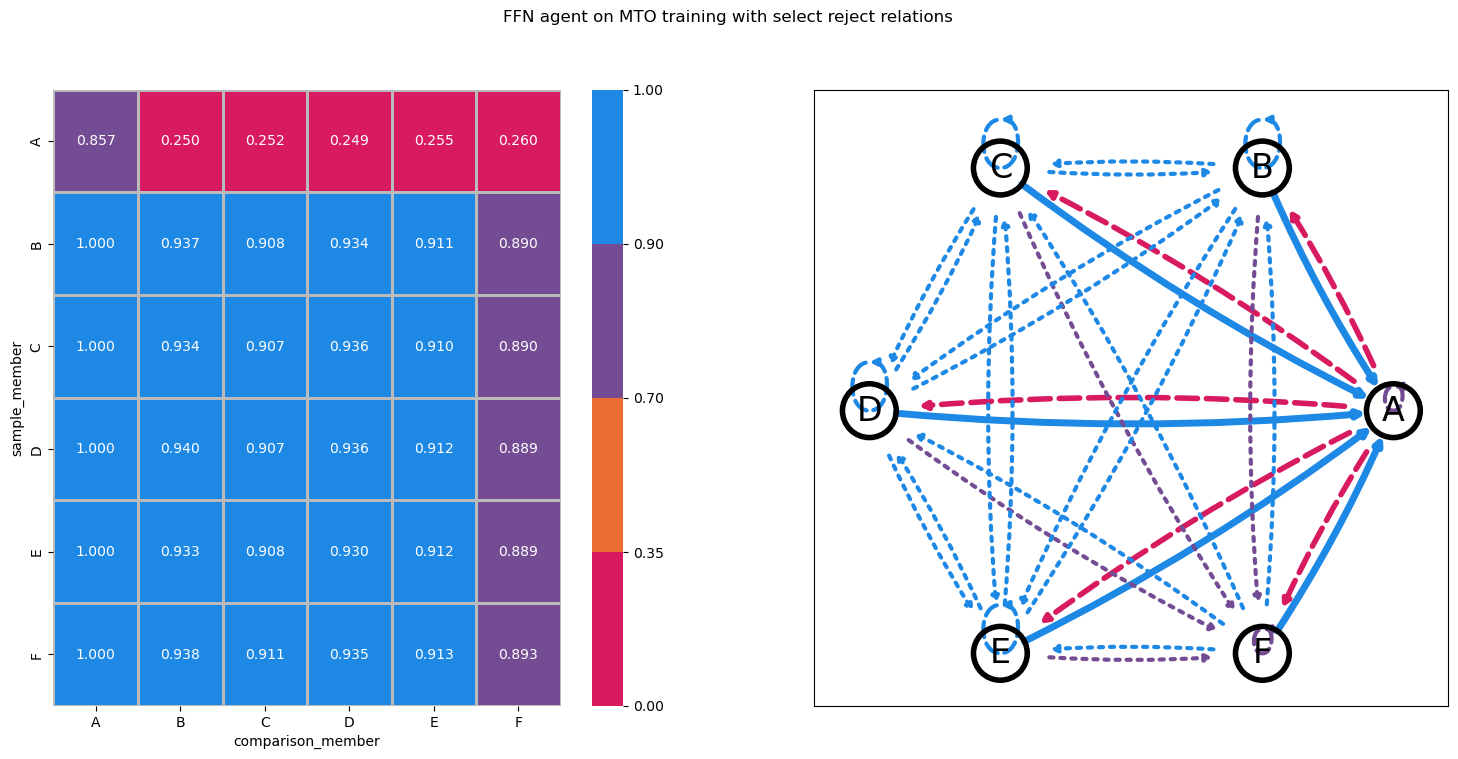

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

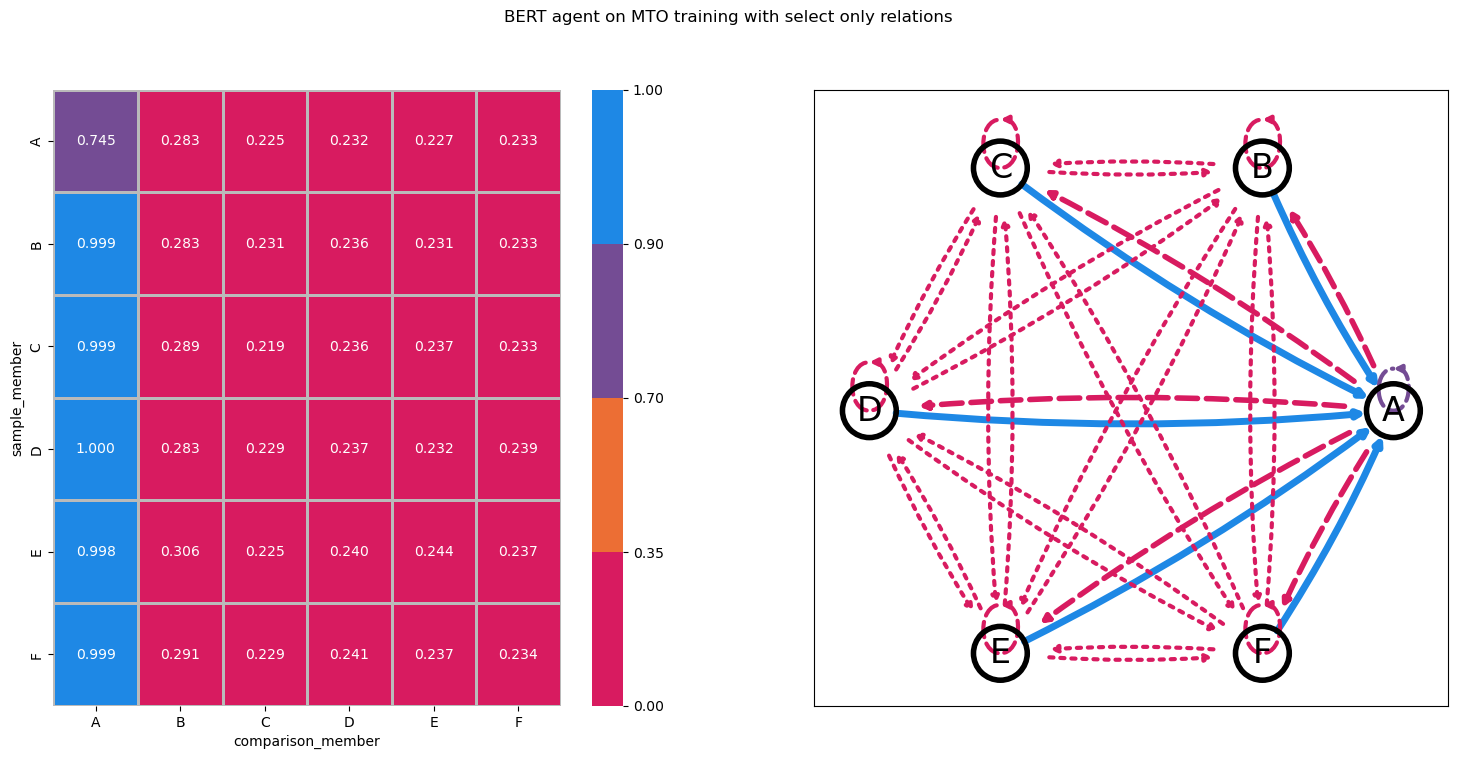

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

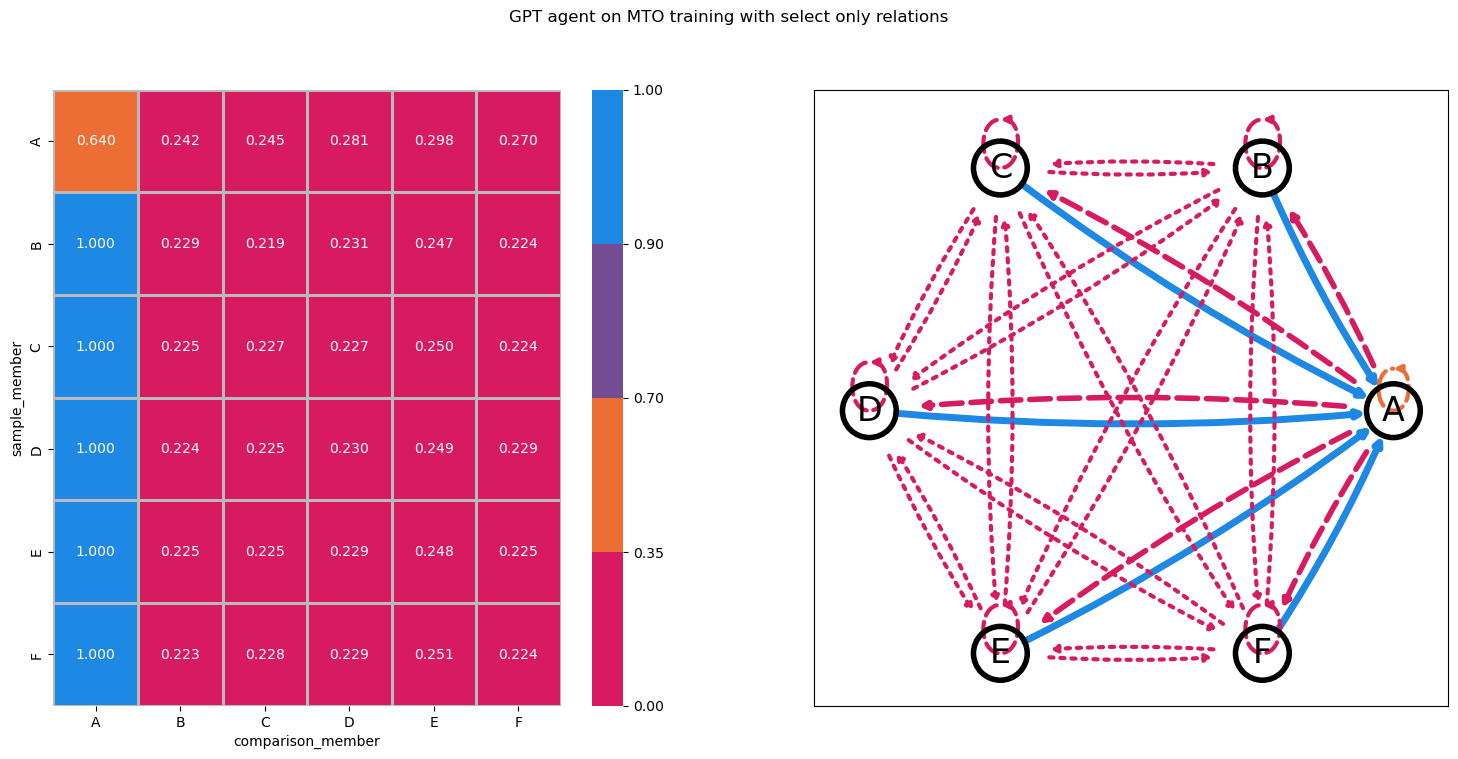

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

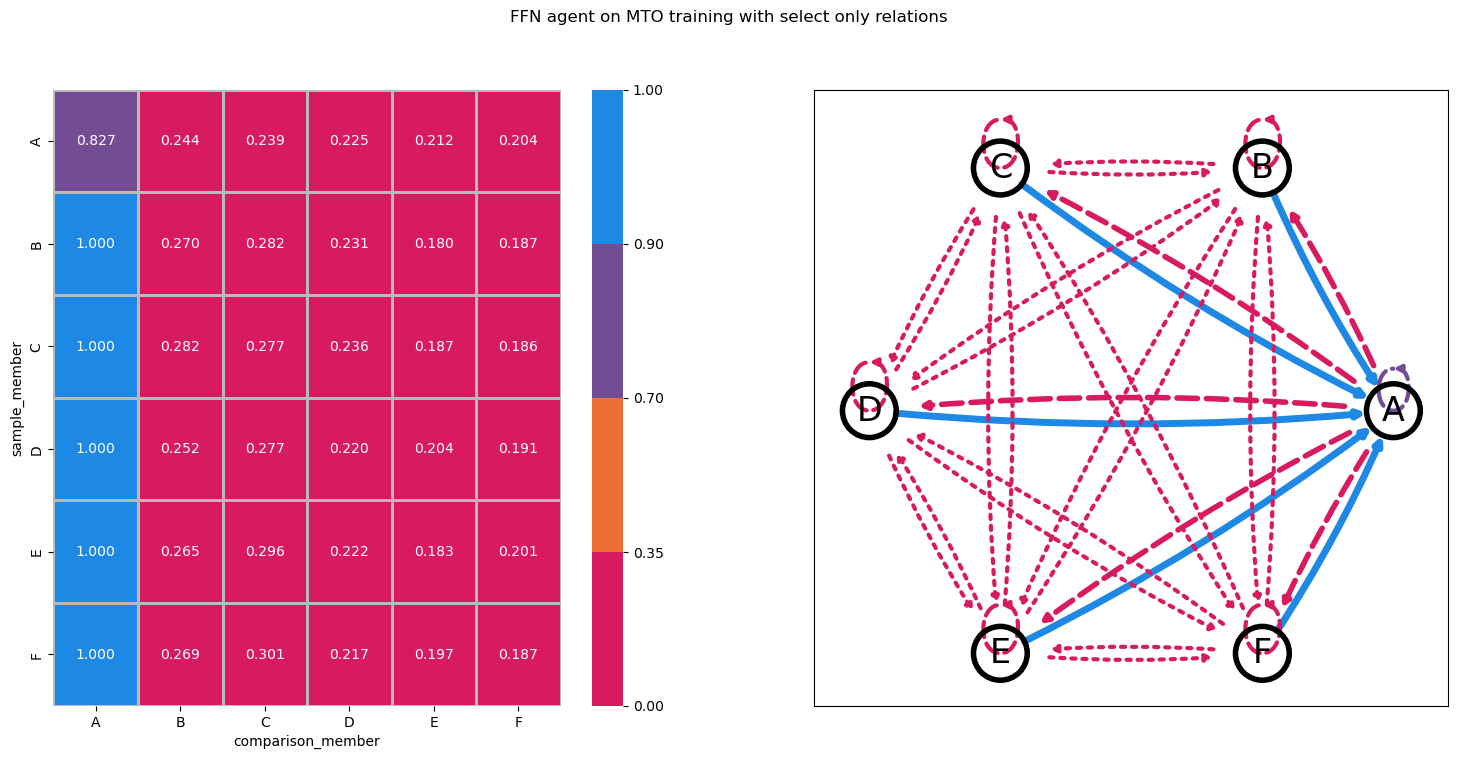

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

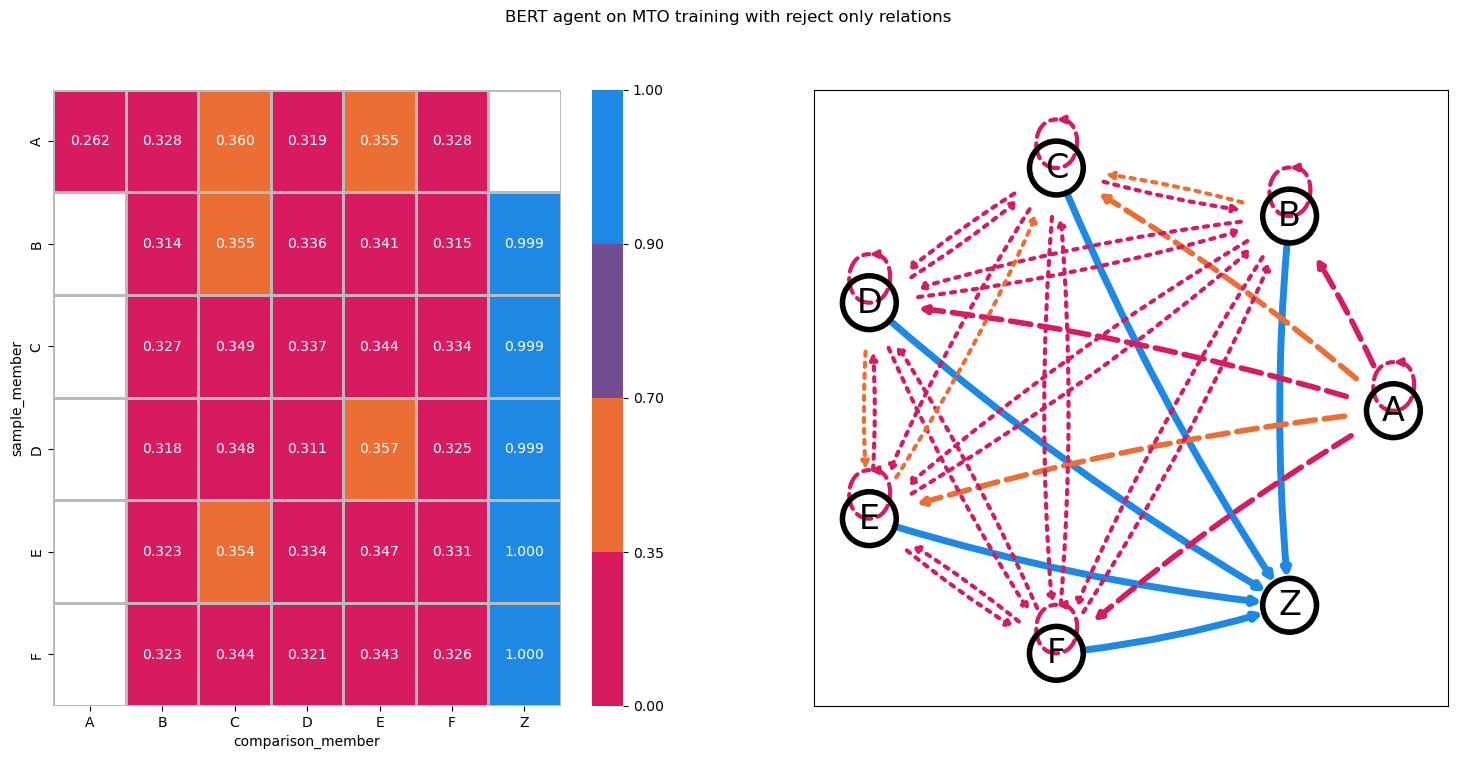

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

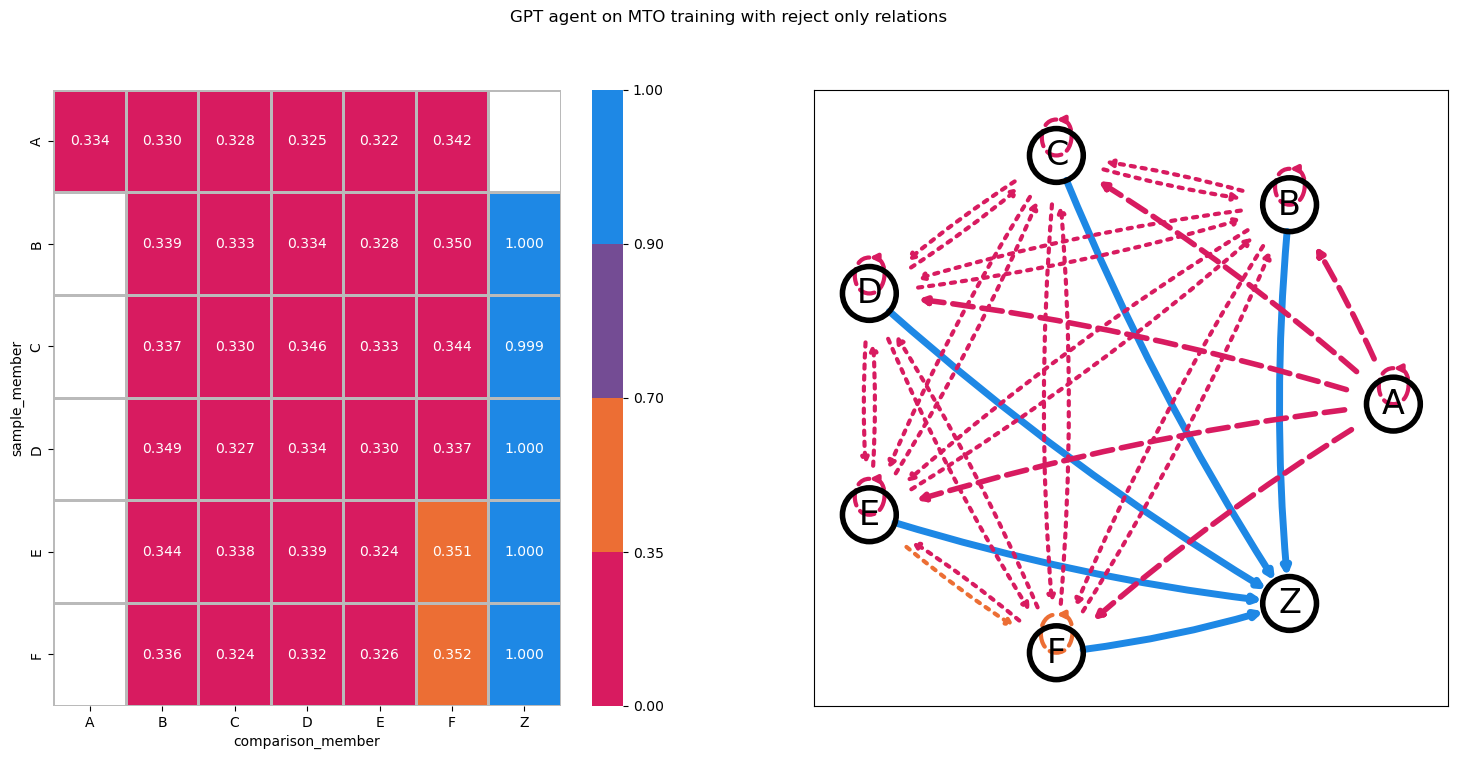

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

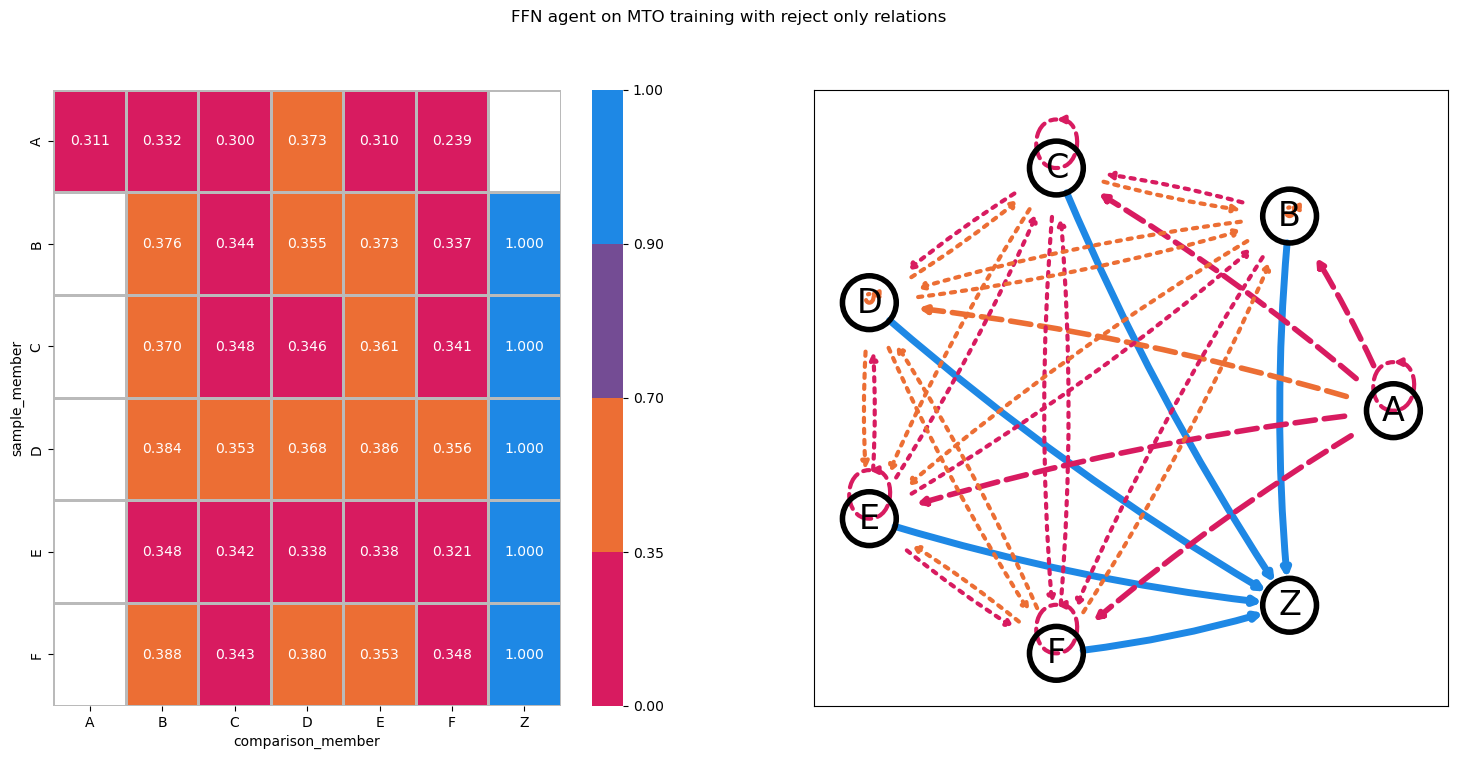

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [15]:
for prtcl_mn in protocol_names:
    protocol_output = protocols_dict[prtcl_mn]["output"]
    protocol_output.loc[protocol_output.sample_subset=="baseline", "sample_subset"]="train"
    for agent_nm in agents_names:
        # output_df['response_score'] = output_df['GPT_response_score']#['BERT_response_score']
        evaluation_graph_dat = get_agent_graph_dat(
            agent_info_df = protocol_output, 
            metric_column = agent_nm+"_response_score"
        )
        evaluation_graph_dat[agent_nm+"_response_score"] = evaluation_graph_dat[agent_nm+"_response_score"].astype("float")
        
        fig, all_axes = plt.subplots(1, 2, figsize=(18, 8))
        axs = all_axes.flat
        
        fig.suptitle(' '.join([
            agent_nm+" agent on",
            protocols_dict[prtcl_mn]['train_structure'], "training with", 
            (protocols_dict[prtcl_mn]['relation_type']).replace("_", " "), "relations"
        ]))
        heatmap_out=plot_heatmap_dat(
            graph_dat_plot=evaluation_graph_dat, 
            metric_column=agent_nm+"_response_score", 
            minimal_cut_value=.9,
            random_level=random_limit,
            ax_plot = axs[0]
        )
        
        plot_graph_results(
            graph_dat_plot=evaluation_graph_dat,
            metric_column=agent_nm+"_response_score",
            node_origin="sample_member",
            node_destiny="comparison_member",
            trial_group="sample_subset",
            minimal_cut_value=.9,
            random_level=random_limit,
            ax_plot = axs[1]
        )
        fig.savefig("salidas/"+folder_path+agent_nm+"_"+prtcl_mn+"_output.pdf")

In [16]:
members=set([stm[0] for stm in output_df.st_sample])
classes=set([int(stm[1]) for stm in output_df.st_sample])

In [17]:
print("classes_n:",len(classes), "| members_n:", len(members))

classes_n: 4 | members_n: 6
